## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [48]:
import pandas as pd
import seaborn as sns

In [49]:
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### De body_mass_g voorspellen op basis van de flipper_length_mm


In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
features= ['flipper_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 3)
dt_regression.fit(penguins[features], penguins['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [52]:
from sklearn.model_selection import train_test_split

233 rijen voor train (70%), 100 voor test (30%). De body_mass_g is onze target variabele. We proberen achter de body_mass_g te komen op basis van de flipper_length_mm

In [53]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

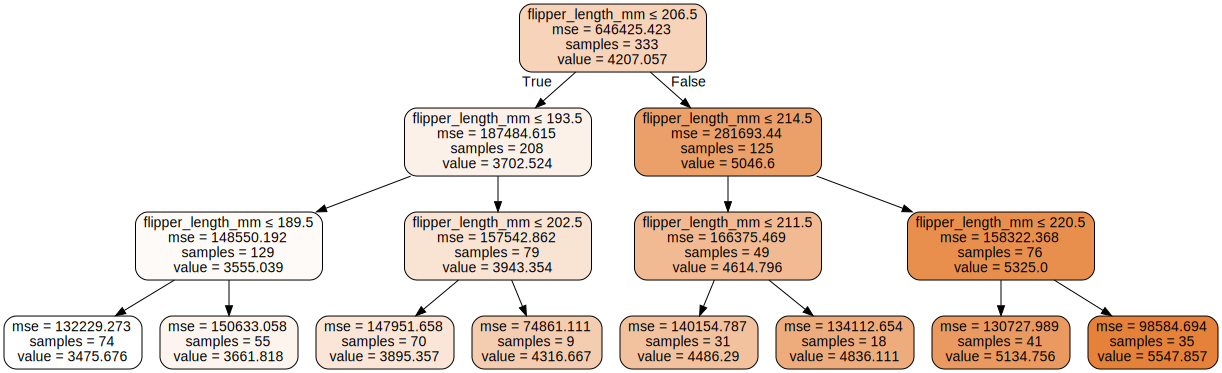

In [54]:
plot_tree_regression(dt_regression, features)

De decision tree laat zien, dat hoe langer de flipper lengte is, hoe meer een pinguïn weegt. Je ziet namelijk links (kleiner of gelijk aan) altijd een lagere waarde.

In [55]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [56]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [57]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 358.846484269518
RMSE on test set 382.95812108523234


We zien hier weer dat de training set een hogere uitkomst heeft dan de test set. De training set had meer data, wat resulteert tot een preciezere uitkomst.

## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    

In [58]:
import pandas as pd
import seaborn as sns

In [59]:
from sklearn.tree import DecisionTreeRegressor

We gebruiken hier weer de bankchurn dataset. We willen hier het banksaldo voorspellen op basis van de leeftijd.

In [60]:
bankchurn = pd.read_csv (r'bankchurners.csv').dropna()

In [61]:
bankchurn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [62]:
bankchurn_train, bankchurn_test = train_test_split(bankchurn, test_size=0.3, stratify=bankchurn['Attrition_Flag'], random_state=42)
print(bankchurn_train.shape, bankchurn_test.shape)

(7088, 23) (3039, 23)


### Het banksaldo voorspellen op basis van de leeftijd

In [63]:
from sklearn.tree import DecisionTreeRegressor
features= ['Customer_Age']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(bankchurn_train[features], bankchurn_train['Total_Revolving_Bal'])

DecisionTreeRegressor(max_depth=3)

In [64]:
from sklearn.model_selection import train_test_split

7088 rijen voor train (70%), 3039 voor test (30%). Het banksaldo is onze target variabele. We proberen achter de het banksaldo komen op basis van de leeftijd van een klant.

In [65]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

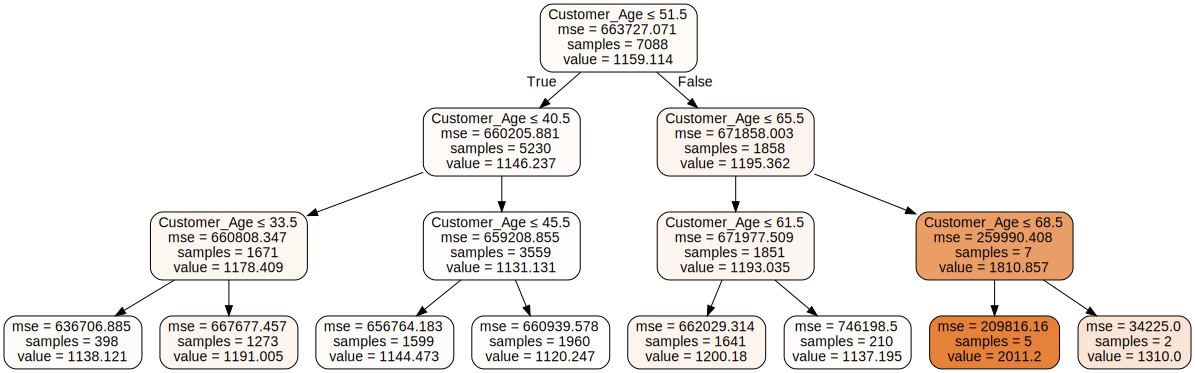

In [66]:
plot_tree_regression(dt_regression, features)

In de bovenstaande decision tree zien we: hoe ouder de klant is (behalve senioren..), hoe hoger de saldo is. Elke linkerpad (kleiner of gelijk aan) is een lagere value. Behalve de rechterste. Dit kan komen omdat er maar 2 samples zijn. We nemen deze fout dus niet kwalijk.

In [67]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)


In [68]:
predictionsOnTrainset = dt_regression.predict(bankchurn_train[features])
predictionsOnTestset = dt_regression.predict(bankchurn_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, bankchurn_train.Total_Revolving_Bal)
rmseTest = calculate_rmse(predictionsOnTestset, bankchurn_test.Total_Revolving_Bal)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 813.713893054226
RMSE on test set 815.3899826615817


We zien hier dat de test set hoger uitvalt dan de training set.. Dat had ik eerlijk niet verwacht. Ik verwacht dat de training set accurater is. Misschien betekent dit dat er enkele uitschieters zitten in de dataset?